In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import os
import geopandas
import contextily as cx
import matplotlib.pyplot as plt
import pickle
import numpy as np
import shapely
from shapely.geometry import Polygon
from utils import *
from region import Region
import matplotlib.pyplot as plt
import pickle

In [3]:
plt.rcParams["figure.figsize"] = (10,8)
plt.rc('font', size=12)

In [4]:
Ordu = pickle.load(open(os.path.join("data","Ordu.pkl"),"rb"))
Trabzon = pickle.load(open(os.path.join("data","Trabzon.pkl"),"rb"))
Adana = pickle.load(open(os.path.join("data","Adana.pkl"),"rb"))
Manisa = pickle.load(open(os.path.join("data","Manisa.pkl"),"rb"))
Johannesburg = pickle.load(open(os.path.join("data","Johannesburg.pkl"),"rb"))
Cairo = pickle.load(open(os.path.join("data","Cairo.pkl"),"rb"))

<BarContainer object of 6 artists>

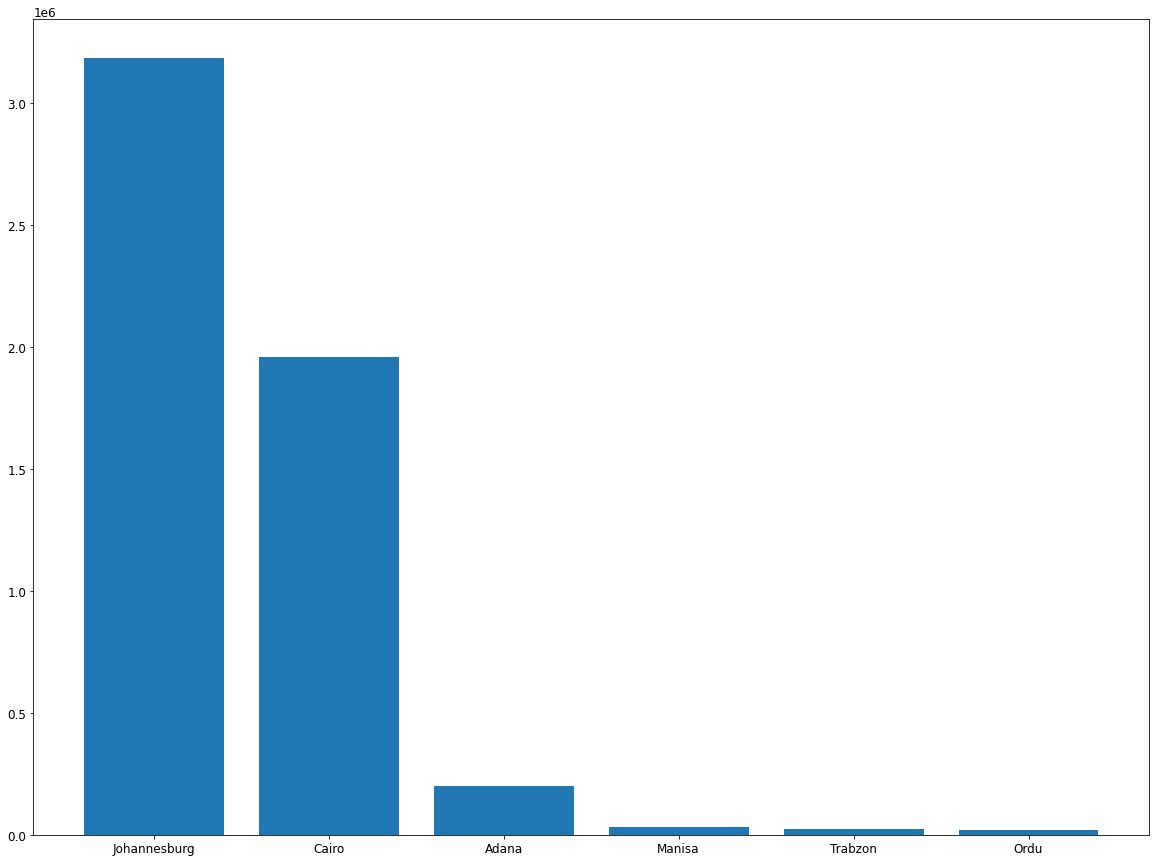

In [6]:
plt.bar([
    "Johannesburg",
    "Cairo",
    "Adana",
    "Manisa",
    "Trabzon",
    "Ordu",
],
    [
    len(Johannesburg.house),
    len(Cairo.house),
    len(Adana.house),
    len(Manisa.house),
    len(Trabzon.house),
    len(Ordu.house),
])


In [7]:
Ordu.house.to_crs("EPSG:26717")

66895       POLYGON ((5573320.659 13233182.906, 5573321.95...
34474       POLYGON ((5572641.699 13233500.291, 5572640.04...
30161       POLYGON ((5572488.204 13232662.600, 5572479.46...
90023       POLYGON ((5571301.159 13231590.499, 5571297.32...
3393        POLYGON ((5570690.555 13230473.530, 5570685.61...
                                  ...                        
18035709    POLYGON ((5574054.449 13237341.733, 5574036.73...
18017693    POLYGON ((5570817.510 13241126.269, 5570831.32...
18041911    POLYGON ((5574711.451 13236285.310, 5574717.21...
18014246    POLYGON ((5573855.596 13246533.550, 5573863.40...
18028582    POLYGON ((5578031.010 13241371.772, 5578021.69...
Length: 18981, dtype: geometry

In [10]:
plt.hist(Cairo.house.to_crs("EPSG:26717").area)

KeyboardInterrupt: 

In [8]:
Cairo.house.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
xmin, ymin, xmax, ymax= Ordu.region.total_bounds

In [15]:
n_cells=30
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = geopandas.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)

In [18]:
Ordu.house

66895       POLYGON ((37.87145 40.98355, 37.87142 40.98357...
34474       POLYGON ((37.87751 40.98569, 37.87761 40.98565...
30161       POLYGON ((37.87267 40.99013, 37.87268 40.99020...
90023       POLYGON ((37.87214 41.00094, 37.87213 41.00097...
3393        POLYGON ((37.86799 41.00895, 37.86806 41.00896...
                                  ...                        
18035709    POLYGON ((37.89567 40.96168, 37.89573 40.96180...
18017693    POLYGON ((37.94008 40.96198, 37.93991 40.96197...
18041911    POLYGON ((37.88468 40.96287, 37.88460 40.96287...
18014246    POLYGON ((37.95953 40.92272, 37.95953 40.92265...
18028582    POLYGON ((37.90038 40.92358, 37.90038 40.92366...
Length: 18981, dtype: geometry

In [17]:
cell

,geometry
0,"POLYGON ((37.854 40.922, 37.854 40.928, 37.860..."
1,"POLYGON ((37.854 40.928, 37.854 40.934, 37.860..."
2,"POLYGON ((37.854 40.934, 37.854 40.940, 37.860..."
3,"POLYGON ((37.854 40.940, 37.854 40.946, 37.860..."
4,"POLYGON ((37.854 40.946, 37.854 40.952, 37.860..."
...,...
553,"POLYGON ((38.028 40.998, 38.028 41.004, 38.034..."
554,"POLYGON ((38.028 41.004, 38.028 41.010, 38.034..."
555,"POLYGON ((38.028 41.010, 38.028 41.015, 38.034..."
556,"POLYGON ((38.028 41.015, 38.028 41.021, 38.034..."


(37.85105824893853, 38.04258323988959, 40.91780788718258, 41.020938359753245)

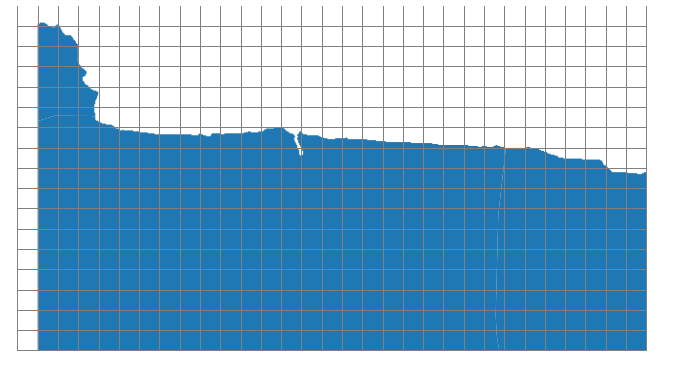

In [16]:
ax = Ordu.region.plot(markersize=.1, figsize=(12, 8))
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")